In [1]:
import pandas as pd

data_df = pd.read_csv('./edit_data/9keywords_train.csv')

In [2]:
data_df.상황키워드.value_counts()

대인관계           10926
재정,은퇴,노후준비      7700
가족관계            7610
건강,죽음           7244
진로,취업,직장        5224
연애,결혼,출산        4085
학업 및 진로         3283
학교폭력/따돌림        3091
직장, 업무 스트레스     2467
Name: 상황키워드, dtype: int64

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상황키워드   51630 non-null  object
 1   감정_대분류  51630 non-null  object
 2   사람문장    51630 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [4]:
data_df['사람문장'] = data_df['사람문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


C:\Users\ykh98\AppData\Local\Temp\ipykernel_28236\1986910390.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['사람문장'] = data_df['사람문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [5]:
data_df['사람문장'].head(10)

0    일은 왜 해도 해도 끝이 없을까 화가 난다 그냥 내가 해결하는 게 나아 남들한테 부...
1    이번 달에 또 급여가 깎였어 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나 최...
2    회사에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까 스트...
3    직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜 일도 많은 데 정말 분하고 섭...
4    얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나 상사인 나에게 먼...
5    직장에 다니고 있지만 시간만 버리는 거 같아 진지하게 진로에 대한 고민이 생겨 직장...
6    성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔 나도 섭섭해 부모님께 좀 ...
7    퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고 더 좋은 회사가 기다리고 있을지...
8    졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어 응 느긋함...
9    요즘 직장생활이 너무 편하고 좋은 것 같아 우리 회사는 복지가 정말 좋아 내가 곧 ...
Name: 사람문장, dtype: object

# 1.  상황키워드 분류

In [6]:
emo_df = data_df

In [7]:
emo_target_df = emo_df['상황키워드']

In [8]:
emo_sentence_df = emo_df['사람문장']

In [9]:
emo_target_df.value_counts()

대인관계           10926
재정,은퇴,노후준비      7700
가족관계            7610
건강,죽음           7244
진로,취업,직장        5224
연애,결혼,출산        4085
학업 및 진로         3283
학교폭력/따돌림        3091
직장, 업무 스트레스     2467
Name: 상황키워드, dtype: int64

In [10]:
type(emo_target_df)

pandas.core.series.Series

In [11]:
emo_df.loc[(emo_df['상황키워드']=='대인관계'), '상황키워드'] = 0
emo_df.loc[(emo_df['상황키워드']=='진로,취업,직장'), '상황키워드'] = 1
emo_df.loc[(emo_df['상황키워드']=='연애,결혼,출산'), '상황키워드'] = 2
emo_df.loc[(emo_df['상황키워드']=='가족관계'), '상황키워드'] = 3
emo_df.loc[(emo_df['상황키워드']=='학업 및 진로'), '상황키워드'] = 4
emo_df.loc[(emo_df['상황키워드']=='학교폭력/따돌림'), '상황키워드'] = 5
emo_df.loc[(emo_df['상황키워드']=='재정,은퇴,노후준비'), '상황키워드'] = 6
emo_df.loc[(emo_df['상황키워드']=='직장, 업무 스트레스'), '상황키워드'] = 7
emo_df.loc[(emo_df['상황키워드']=='건강,죽음'), '상황키워드'] = 8

In [12]:
emo_target_df = emo_df['상황키워드']

In [13]:
emo_target_df.value_counts()

0    10926
6     7700
3     7610
8     7244
1     5224
2     4085
4     3283
5     3091
7     2467
Name: 상황키워드, dtype: int64

In [14]:
from konlpy.tag import Okt
from tqdm import tqdm

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [16]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','을','으로','자','에','와','한','하다']


In [17]:
okt = Okt()

In [18]:
tokenized_X_train = []

for sentence in tqdm(emo_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_X_train.append(stopwords_removed_sentence)

100%|██████████| 51630/51630 [02:03<00:00, 417.61it/s]


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_X_train)

In [21]:
print(tokenizer.word_index)

{'내': 1, '것': 2, '있다': 3, '나': 4, '같다': 5, '너무': 6, '친구': 7, '보다': 8, '없다': 9, '않다': 10, '못': 11, '안': 12, '되다': 13, '좋다': 14, '싶다': 15, '말': 16, '에게': 17, '생각': 18, '이야': 19, '에서': 20, '수': 21, '사람': 22, '더': 23, '들다': 24, '게': 25, '만': 26, '받다': 27, '하고': 28, '일': 29, '모르다': 30, '자다': 31, '그렇다': 32, '돼다': 33, '한테': 34, '돈': 35, '나다': 36, '힘들다': 37, '고': 38, '해': 39, '다': 40, '가다': 41, '해보다': 42, '거': 43, '정말': 44, '로': 45, '때': 46, '남편': 47, '많이': 48, '마음': 49, '부모님': 50, '어떻다': 51, '아내': 52, '적': 53, '걱정': 54, '나르다': 55, '거야': 56, '아니다': 57, '회사': 58, '그': 59, '때문': 60, '이제': 61, '지금': 62, '슬프다': 63, '가족': 64, '요즘': 65, '먹다': 66, '응': 67, '많다': 68, '엄마': 69, '기분': 70, '집': 71, '자식': 72, '공부': 73, '오늘': 74, '우리': 75, '열심히': 76, '나이': 77, '아프다': 78, '난': 79, '야': 80, '다른': 81, '해주다': 82, '오다': 83, '결혼': 84, '스럽다': 85, '왜': 86, '얘기': 87, '살다': 88, '앞': 89, '혼자': 90, '맞다': 91, '인': 92, '주다': 93, '걸': 94, '준비': 95, '이번': 96, '일이': 97, '까지': 98, '몸': 99, '아들': 100, '랑': 101, '라고': 102, '아

In [22]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 14975
등장 빈도가 2번 이하인 희귀 단어의 수: 5832
단어 집합에서 희귀 단어의 비율: 38.9449081803005
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.5076223375168385


In [23]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 9144


In [24]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(tokenized_X_train)
X_train = tokenizer.texts_to_sequences(tokenized_X_train)

In [25]:
import numpy as np

y_train = np.array(emo_target_df)

In [26]:
y_train

array([1, 1, 1, ..., 6, 0, 0], dtype=object)

최대 길이 : 95
평균 길이 : 28.896533023435985


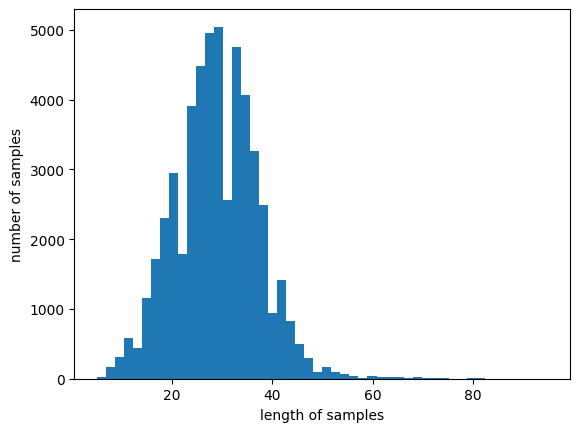

In [27]:
import matplotlib.pyplot as plt

print('최대 길이 :',max(len(review) for review in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [28]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [29]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 99.0703079604881


In [30]:
X_train = pad_sequences(X_train, maxlen=max_len)

In [31]:
len(y_train)

51630

In [32]:
len(X_train)

51630

In [33]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [34]:
y_train = y_train.astype(int)

In [35]:
pd.Series(y_train).value_counts()

0    10926
6     7700
3     7610
8     7244
1     5224
2     4085
4     3283
5     3091
7     2467
dtype: int64

In [36]:
num = np.unique(y_train, axis=0)
num = num.shape[0]
one_hot_y_train = np.eye(num)[y_train]
one_hot_y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [37]:
embedding_dim = 100
hidden_units = 128

from keras.layers import Conv1D, MaxPooling1D, Flatten, Bidirectional, GRU

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(9, activation='softmax'))


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('./save_model_tmp/best_model(prototype).h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, one_hot_y_train, epochs=10, callbacks=[es, mc], batch_size=128, validation_split=0.2)

Epoch 1/10
316/323 [============================>.] - ETA: 0s - loss: 1.4475 - acc: 0.4640
Epoch 1: val_acc improved from -inf to 0.50843, saving model to ./save_model_tmp\best_model(prototype).h5
323/323 [==============================] - 14s 8ms/step - loss: 1.4377 - acc: 0.4682 - val_loss: 1.4724 - val_acc: 0.5084
Epoch 2/10
313/323 [============================>.] - ETA: 0s - loss: 0.8317 - acc: 0.7170
Epoch 2: val_acc improved from 0.50843 to 0.54310, saving model to ./save_model_tmp\best_model(prototype).h5
323/323 [==============================] - 2s 6ms/step - loss: 0.8307 - acc: 0.7173 - val_loss: 1.3965 - val_acc: 0.5431
Epoch 3/10
320/323 [============================>.] - ETA: 0s - loss: 0.6859 - acc: 0.7675
Epoch 3: val_acc did not improve from 0.54310
323/323 [==============================] - 2s 5ms/step - loss: 0.6867 - acc: 0.7671 - val_loss: 1.4919 - val_acc: 0.5340
Epoch 4/10
322/323 [============================>.] - ETA: 0s - loss: 0.5979 - acc: 0.7978
Epoch 4: va

In [38]:
loaded_model = load_model('./save_model_tmp/best_model(prototype).h5')

In [39]:
loss, acc = loaded_model.evaluate(X_train, one_hot_y_train, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

1614/1614 - 4s - loss: 0.8215 - acc: 0.7220 - 4s/epoch - 2ms/step
Restored model, accuracy: 72.20%


In [40]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         914400    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 9)                 1161      
                                                                 
Total params: 1,032,809
Trainable params: 1,032,809
Non-trainable params: 0
_________________________________________________________________


In [41]:
pd.DataFrame(history.history)

,loss,acc,val_loss,val_acc
0,1.437651,0.468236,1.472415,0.508425
1,0.830650,0.717315,1.396530,0.543095
2,0.686652,0.767117,1.491924,0.533992
3,0.597795,0.797768,1.568366,0.536316
4,0.532109,0.820550,1.597649,0.531377
5,0.486457,0.838539,1.712942,0.517916


In [42]:
import re

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(np.argmax(loaded_model.predict(pad_new), axis=-1)) # 예측
  if score == 0:
    print('대인관계')
  elif score == 1:
    print('진로,취업,직장')
  elif score == 2:
    print('연애,결혼,출산')
  elif score == 3:
    print('가족관계')
  elif score == 4:
    print('학업 및 진로')
  elif score == 5:
    print('학교폭력/따돌림')
  elif score == 6:
    print('재정,은퇴,노후준비')
  elif score == 7:
    print('직장, 업무 스트레스')
  elif score == 8:
    print('건강,죽음')
  # print(f'score = {score}')

In [43]:
sentiment_predict('엄마가 밥먹으라해')


1/1 [==============================] - 0s 210ms/step
가족관계


In [44]:
sentiment_predict('여자친구가 나한테 왜 그럴까?')

1/1 [==============================] - 0s 15ms/step
연애,결혼,출산


In [45]:
sentiment_predict('사는게 쉽지않아')

1/1 [==============================] - 0s 17ms/step
건강,죽음


In [46]:
sentiment_predict('밥먹기가 귀찮아')

1/1 [==============================] - 0s 16ms/step
대인관계


In [47]:
sentiment_predict('나 진짜 죽을것 같은데')

1/1 [==============================] - 0s 15ms/step
건강,죽음


In [48]:
sentiment_predict('이 자식들이')

1/1 [==============================] - 0s 17ms/step
건강,죽음


In [49]:
sentiment_predict('나는 언제까지 살수 있을까')

1/1 [==============================] - 0s 16ms/step
대인관계


In [50]:
sentiment_predict('죽는게 두려워')

1/1 [==============================] - 0s 18ms/step
건강,죽음


In [51]:
sentiment_predict('건강을 챙겨야하는데 잘 안돼 너무 걱정 끼치는 것 같은데 많이 힘들어해')

1/1 [==============================] - 0s 14ms/step
건강,죽음


In [52]:
sentiment_predict('치매 때문에 많이 힘들어해')

1/1 [==============================] - 0s 17ms/step
건강,죽음


In [53]:
sentiment_predict('종강은 언제오나')

1/1 [==============================] - 0s 14ms/step
학교폭력/따돌림


In [54]:
sentiment_predict('엘리베이터에 갇혔어')

1/1 [==============================] - 0s 15ms/step
건강,죽음


In [55]:
sentiment_predict('프로젝트 하고 있어')

1/1 [==============================] - 0s 17ms/step
직장, 업무 스트레스


In [56]:
sentiment_predict('엄마가 피부과 빨리 갔다오래')

1/1 [==============================] - 0s 15ms/step
가족관계


In [57]:
sentiment_predict('쉽지 않아')

1/1 [==============================] - 0s 16ms/step
학교폭력/따돌림


In [58]:
sentiment_predict('아이유랑 결혼하고싶어')

1/1 [==============================] - 0s 15ms/step
연애,결혼,출산


In [59]:
test_val_df = pd.read_csv('./edit_data/9keywords_validation.csv')

In [60]:
test_list = []
for sentence in tqdm(test_val_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    test_list.append(stopwords_removed_sentence)

100%|██████████| 6641/6641 [00:21<00:00, 306.95it/s]


In [61]:
X_test = tokenizer.texts_to_sequences(test_list)
X_test = pad_sequences(X_test, maxlen=max_len)

In [62]:
y_pred = loaded_model.predict(X_test)

208/208 [==============================] - 0s 2ms/step


In [63]:
tmp = np.argmax(loaded_model.predict(X_test), axis=-1) # 예측


208/208 [==============================] - 0s 2ms/step


In [64]:
test_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상황키워드   6641 non-null   object
 1   감정_대분류  6641 non-null   object
 2   사람문장    6641 non-null   object
dtypes: object(3)
memory usage: 155.8+ KB


In [65]:
test_val_df['추정_상황키워드'] = pd.DataFrame(tmp)

In [66]:
test_val_df['추정_상황키워드'].value_counts()

8    1154
0    1126
3    1052
6     985
1     936
5     487
4     377
2     376
7     148
Name: 추정_상황키워드, dtype: int64

In [67]:
def num_to_emo(score):
    if score == 0:
        return '대인관계'
    elif score == 1:
        return '진로,취업,직장'
    elif score == 2:
        return '연애,결혼,출산'
    elif score == 3:
        return '가족관계'
    elif score == 4:
        return '학업 및 진로'
    elif score == 5:
        return '학교폭력/따돌림'
    elif score == 6:
        return '재정,은퇴,노후준비'
    elif score == 7:
        return '직장, 업무 스트레스'
    elif score == 8:
        return '건강,죽음'

In [68]:
test_val_df['추정_상황키워드'] = test_val_df['추정_상황키워드'].apply(num_to_emo)

In [69]:
test_val_df.to_csv('./save_model_tmp/tmp_val_data(prototype).csv', index=False)

In [70]:
val_df = pd.read_csv('./save_model_tmp/tmp_val_data(prototype).csv')

In [71]:
correct_df = val_df[val_df['상황키워드'] == val_df['추정_상황키워드']]

In [72]:
len(correct_df)/ len(val_df)

0.7145008281885258

In [ ]:
import pickle
with open('tokenizer_situation.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)